In [1]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error
import math
from tensorflow.keras.models import load_model
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

In [2]:
df = pd.read_csv('Crude.csv')

In [3]:
df

,Date,Closing Value
0,1/2/1986,25.56
1,1/3/1986,26.00
2,1/6/1986,26.53
3,1/7/1986,25.85
4,1/8/1986,25.87
...,...,...
8218,7/3/2018,74.19
8219,7/4/2018,NaN
8220,7/5/2018,73.05
8221,7/6/2018,73.78


In [4]:
df.isnull().any()

Date             False
Closing Value     True
dtype: bool

In [5]:
df.isnull().sum()

Date             0
Closing Value    7
dtype: int64

In [6]:
df.dropna(axis=0, inplace=True)

In [7]:
df.isnull().any()

Date             False
Closing Value    False
dtype: bool

In [8]:
data =  df.reset_index()['Closing Value']

In [9]:
data

0       25.56
1       26.00
2       26.53
3       25.85
4       25.87
        ...  
8211    73.89
8212    74.19
8213    73.05
8214    73.78
8215    73.93
Name: Closing Value, Length: 8216, dtype: float64

In [10]:
sc = MinMaxScaler(feature_range = (0, 1))

In [11]:
data = sc.fit_transform(np.array(data).reshape(-1,1))

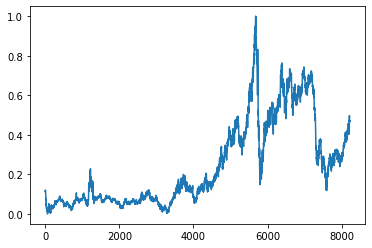

In [12]:
plt.plot(data)

In [13]:
train_size = int(len(data) * 0.70)
test_size = len(data) - train_size
train, test = data[0:train_size, :], data[train_size:len(data), :]

In [14]:
def create_data_set(_data_set, _look_back=1):
    data_x, data_y = [], []
    for i in range(len(_data_set) - _look_back - 1):
        a = _data_set[i:(i + _look_back), 0]
        data_x.append(a)
        data_y.append(_data_set[i + _look_back, 0])
    return np.array(data_x), np.array(data_y)

In [15]:
look_back =10
X_train,Y_train=create_data_set(train, look_back)
X_test,Y_test=create_data_set(test, look_back)

In [16]:
X_train.shape

(5740, 10)

In [17]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))